We are using Support Vector Machines to determine if ...
{'C': 0.1}
{'C': 0.5}
   rushing  passing  total (static)  rush count (CV)  \
0     62.5  51.5625         70.3125          73.4375   

   rush count cumulative (CV)  
0                      40.625  


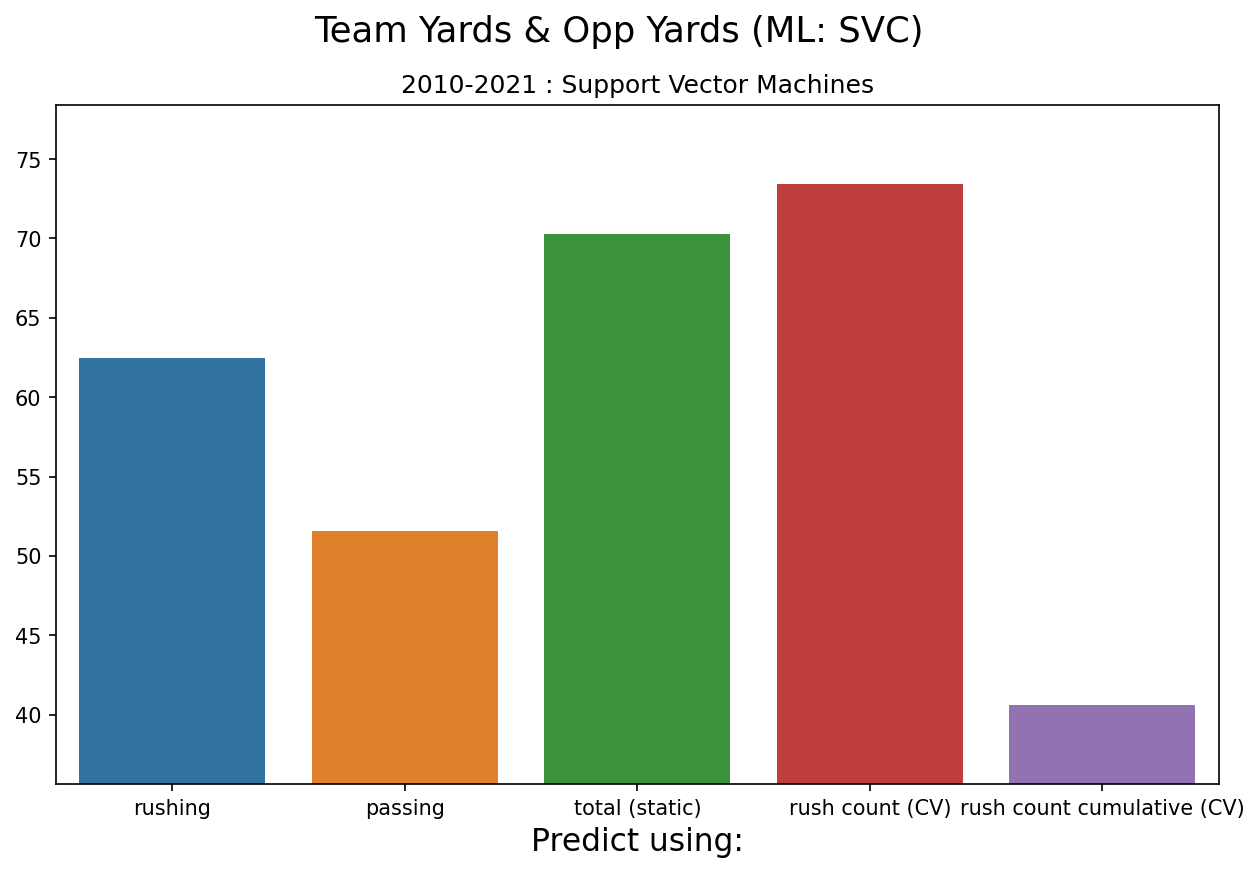

In [1]:
import utils.game_utils as gu

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.svm import SVC


### Output results - helper
def print_results(model, X_test, y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {acc}")

  # print("Confusion Matrix:")
  # print(confusion_matrix(y_test, y_pred))

  # print('Classification Report')
  # print(classification_report(y_test, y_pred))
  # plot_confusion_matrix(model, X_test, y_test)
def get_model_from_search(X_train, y_train):
  param_grid = {
    'C':[0.001,0.01,0.1,0.5,1],
    # 'kernel':['linear','rbf','poly'],
    # 'gamma':['scale','auto'],
    # 'degree':[2,3,4],
    # 'epsilon':[0,0.01,0.1,0.5,1,2]
                }
  model = GridSearchCV(SVC(), param_grid=param_grid)
  model.fit(X_train, y_train)
  print(model.best_params_)
  # -> {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

  return model
def get_model_from_static(X_train, y_train):
  # model = SVC(C=0.1, degree=2, gamma='scale')
  model = SVC(C=0.1, degree=2, gamma='scale')
  model.fit(X_train, y_train)
  return model
def estimate_accuracy(X, y, type='standard'):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

  if type == 'search':
    model = get_model_from_search(X_train, y_train)
  elif type == 'static':
    model = get_model_from_static(X_train, y_train)
  else:
    model = SVC()
    model.fit(X_train, y_train)
    
  # now predict
  y_pred = model.predict(X_test)

  # print_results(model, X_test, y_test, y_pred)
  return accuracy_score(y_test, y_pred)
def draw_final_outcomes(df, algorithm, title):
  plt.figure(figsize=(10,6), dpi=150)
  sns.barplot(data=df)
  plt.ylim(df.T.min()[0] - 5, df.T.max()[0] + 5)
  plt.suptitle(title, fontsize=17)
  plt.title(f'2010-2021 : {algorithm}')
  plt.xlabel('Predict using:', fontsize=15)
  plt.show();
def try_field(field, model_type='standard'):
  ''' 
  Provide a single field and an optional model type
  to run a SVM.
  
  model_types:
      - standard
      - search
      - static
  '''
  final_fields = [
    'win',
    f'team_{field}',
    f'opponent_{field}',
  ]
  df = gu.get_year(nfld.data(), 2020)[final_fields]
  # df = pd.get_dummies(df)
  X = df.drop('win', axis=1)
  y = df['win']
  return estimate_accuracy(X, y, model_type)

data_path = '../../../data'
nfld = gu.NFL_Data(data_path)
data = {}

print("We are using Support Vector Machines to determine if ...")


data['rushing'] = try_field('rush_yards')
# data['rushing (static)'] = try_field('rush_yards', 'static')
# data['rushing (CV)'] = try_field('rush_yards', 'search')
data['passing'] = try_field('pass_yards')
# data['passing (static)'] = try_field('pass_yards', 'static')
# data['passing (CV)'] = try_field('pass_yards', 'search')
# data['total'] = try_field('total_yards')
data['total (static)'] = try_field('total_yards', 'static')
# data['total (CV)'] = try_field('total_yards', 'search')
data['rush count (CV)'] = try_field('rush_count', 'search')
data['rush count cumulative (CV)'] = try_field('cml_rush_count_before', 'search')

# convert values to arrays
for item in data: data[item] = [data[item]]
pdf = pd.DataFrame(data) * 100 # get to percs
print(pdf)
draw_final_outcomes(pdf, 'Support Vector Machines', 'Team Yards & Opp Yards (ML: SVC)')